In [86]:
import pandas as pd

In [87]:
df = pd.read_csv('Height-Weight Data.csv')

In [88]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [90]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [91]:
df.shape

(3501, 2)

In [92]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Height VS Weight')

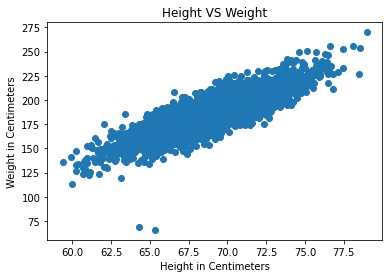

In [93]:
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height in Centimeters')
plt.ylabel('Weight in Centimeters')
plt.title('Height VS Weight')

**Split the dataset**

In [119]:
x = df[['Height']]
y = df['Weight']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.70, random_state=42)

In [97]:
print(xtrain.shape)
print(ytrain.shape)

(2450, 1)
(2450,)


In [98]:
xtrain.head()

,Height
1374,75.155410
231,71.968306
1769,69.963912
1812,66.475562
2658,72.731788


In [99]:
ytrain.head()

1374    214.370580
231     201.528177
1769    191.065448
1812    197.646409
2658    213.683943
Name: Weight, dtype: float64

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
x.shape

(3501, 1)

In [102]:
xtrain.shape

(2450, 1)

In [103]:
lr = LinearRegression().fit(xtrain, ytrain)

In [104]:
b = lr.coef_
a = lr.intercept_
print("Coefficient=", a, "\nIntercept = ", b)

Coefficient= -224.00779357167536 
Intercept =  [5.95092905]


In [118]:
x1 = 75
y = a + b*x1
y

array([222.31188547])

In [113]:
lr.predict([[75]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([222.31188547])

In [121]:
df['Predicted Height'] = lr.predict(x)

In [122]:
df

,Height,Weight,Predicted Height
0,73.847017,241.893563,215.450566
1,68.781904,162.310473,185.308438
2,74.110105,212.740856,217.016186
3,71.730978,220.042470,202.858170
4,69.881796,206.349801,191.853816
...,...,...,...
3496,69.296830,185.649086,188.372725
3497,70.542201,210.198845,195.783842
3498,73.912549,202.429960,215.840543
3499,67.396021,144.277671,177.061145


In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [127]:
MAE = mean_absolute_error(ytest, lr.predict(xtest))
MSE = mean_squared_error(ytest, lr.predict(xtest))
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", MSE)

Mean Absolute Error:  8.221025004936374
Mean Squared Error:  102.76672319484601


Text(0, 0.5, 'Predicted Weight in Centimeters')

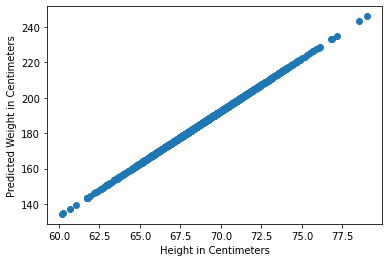

In [130]:
plt.scatter(xtest, lr.predict(xtest))
plt.xlabel("Height in Centimeters")
plt.ylabel("Predicted Weight in Centimeters")